# Data Preparation and Exploration

This notebook contains code for exploring and visualizing the data 

In [9]:
# Standard library imports
import os
import random
from PIL import Image
from collections import Counter

# PyTorch and torchvision imports
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Project-specific imports
from hamburger_hotdog_pizza_classifier.config import RAW_DATA_DIR

# Directory paths
image_path = RAW_DATA_DIR

# Data loading parameters
BATCH_SIZE = 32

print('Imported necessary libraries/variables')

Imported necessary libraries/variables


In [2]:
def walk_through_directory(directory):
    """Walks through dir_path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(directory):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

# walk_through_directory(image_path)

In [3]:
# Setup train and testing paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'

## Visualizing random images

In this section of the notebook we will: 
1. Get all the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Open the image with Python's PIL
5. Show the image and print metadata

Image class: hot_dog
Image size: (512, 512)


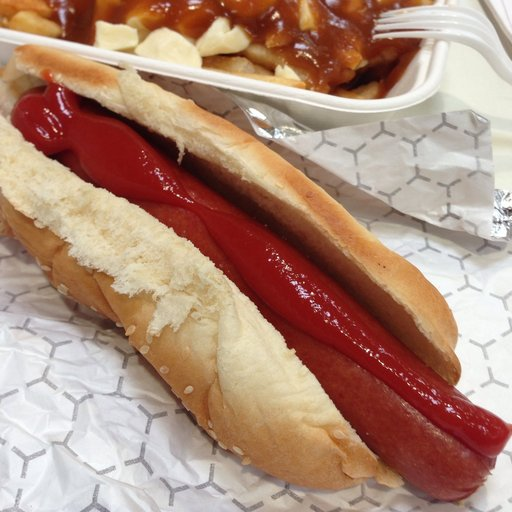

In [4]:
# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Randomly select a random image from the image path 
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name
image_class = random_image_path.parent.stem

#4. Open image
img = Image.open(random_image_path)

#5. Print metadata
# print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image size: {img.size}")
img

## Exploring the size of the dataset

Let's explore the length of our train set, test set, and dataloaders. We will also look at what classes/labels we have and the the number of data examples for each class.

In [5]:
train_data = ImageFolder(train_dir)
test_data = ImageFolder(test_dir)
print(f"Length of train dataset: {len(train_data)}")
print(f"Length of test dataset: {len(test_data)}")

Length of train dataset: 2250
Length of test dataset: 750


In [6]:
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)
print(f"Length of train loader: {len(train_loader)}")
print(f"Length of test loader: {len(test_loader)}")

Length of train loader: 71
Length of test loader: 24


In [7]:
class_names = train_data.classes
class_names_to_idx = train_data.class_to_idx
print(class_names_to_idx)

{'hamburger': 0, 'hot_dog': 1, 'pizza': 2}


In [8]:
train_class_counts = Counter([label for _, label in train_data])
print(f"Training dataset class distribution: {dict(train_class_counts)}")

Training dataset class distribution: {0: 750, 1: 750, 2: 750}
